In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
from glob import glob
from utils.geotif_io import readTiff, writeTiff
import xdem
from utils.lay_stack import lay_stack


In [27]:
### Setting
path_ele_dif_map = '/home/xin/Developer-luo/Glacier-in-SETP/data/aster-stereo/tiles-dif-map/tile_30_93.tif'
ele_dif_map, _ = readTiff(path_ele_dif_map)
ele_dif_map


array([[[  8.81835938,          nan,          nan, ...,  16.9453125 ,
         -20.73583984,          nan],
        [ 11.68408203,          nan,          nan, ...,  22.89941406,
         -18.63085938,          nan],
        [ 11.49609375,          nan,          nan, ...,  24.86914062,
         -16.49267578,          nan],
        ...,
        [         nan,  -3.546875  ,          nan, ...,          nan,
          -7.10742188,          nan],
        [         nan,  -4.02294922,          nan, ...,          nan,
          -6.44970703,          nan],
        [         nan,  -2.41357422,          nan, ...,          nan,
          -3.93554688,          nan]],

       [[  9.58203125,          nan,          nan, ...,  17.43847656,
         -29.43603516,          nan],
        [  8.19970703,          nan,          nan, ...,  18.39599609,
         -29.39404297,          nan],
        [  1.32714844,          nan,          nan, ...,  13.41113281,
         -34.05566406,          nan],
        ...,


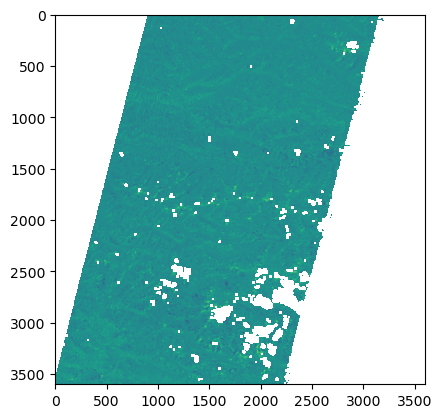

In [28]:
plt.imshow(ele_dif_map[:,:,2])


In [61]:
### Setting
path_ele_dif_map_ = '/home/xin/Developer-luo/Glacier-in-SETP/data/aster-stereo/tiles-dif-map/tile_31_93_albers.tif'
ele_dif_map_, _ = readTiff(path_ele_dif_map_)
ele_dif_map_


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

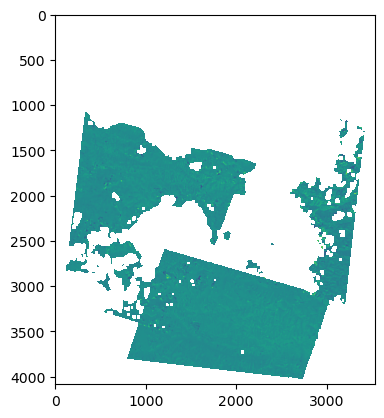

In [62]:
plt.imshow(ele_dif_map_[:,:,2])


In [63]:
# ele_dif_map[2500,2000,2]
ele_dif_map[500,500,2]


nan

In [45]:
ele_dif_map_[2500,2000,2]
ele_dif_map_[3000,2800,2]


1.8862764835357666

In [64]:
from utils.crop2extent import img2extent
path_srtm_albers = '/home/xin/Developer-luo/Glacier-in-SETP/data/dem-data/srtm-c/tiles/tile_31_93_albers.tif'
srtm_albers, srtm_albers_info = readTiff(path_srtm_albers)
elev_dif_maps_ = img2extent(path_img=path_ele_dif_map_, \
                    extent=srtm_albers_info['geoextent'], size_target=srtm_albers.shape) # read and resize    
elev_dif_maps_ = np.nan_to_num(elev_dif_maps_, nan=-999)    ### convert nan to -999.
elev_dif_maps_[:,:,2]


array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)

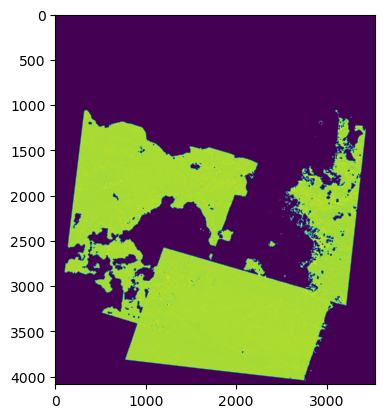

In [65]:
plt.imshow(elev_dif_maps_[:,:,2])


In [58]:
path_glacier = 'data/land-cover/rgi60/tiles/tile_31_93_albers.tif'
path_srtm_albers = 'data/dem-data/srtm-c/tiles/tile_31_93_albers.tif'  ## used for area calculation.
srtm_albers, srtm_albers_info = readTiff(path_srtm_albers)
glacier_mask = img2extent(path_img=path_glacier, \
                    extent=srtm_albers_info['geoextent'], size_target=srtm_albers.shape) # read and resize


In [60]:
glacier_area_bins, mean_dif_bins, std_dif_bins = {}, {}, {}
dem_glacier = srtm_albers*glacier_mask
elev_start, elev_end = 5000, 6400
num_bin = int((elev_end - elev_start)/100)
for i_bin in range(num_bin):
    elev_start_bin, elev_end_bin = elev_start + i_bin*100, elev_start + (i_bin+1)*100
    print('bin range: %s-%s.'%(elev_start_bin, elev_end_bin))
    ### 1) glacier area of bin
    # glacier_area_bins[str(elev_start_bin)+'_'+str(elev_end_bin)] = []
    ids_pixels_bin = np.where((dem_glacier > elev_start_bin) & (dem_glacier < elev_end_bin))
    print(ids_pixels_bin[0].shape[0])
    glacier_area_bin = ids_pixels_bin[0].shape[0]*0.03*0.03   ### the height and width of pixel is 0.03 km
    glacier_area_bins[str(elev_start_bin)+'_'+str(elev_end_bin)] = glacier_area_bin
    ### 2) statistic (mean and std values) of bins
    mean_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)] = []
    std_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)] = []
    ## for each (year) elevation map.
    # elev_dif_maps_filter = elev_dif_maps.copy()
    # elev_dif_maps_filter = np.ma.masked_where(elev_dif_maps_filter==-999, elev_dif_maps_filter)
    for i_dem in range(elev_dif_maps_.shape[-1]):
        print('i_dem:', i_dem)
        #### 1. Elevation differences filtering by mean +- 3*sigma
        ids_dem_bin = np.where((dem_glacier > elev_start_bin) & (dem_glacier < elev_end_bin) & \
                                                (elev_dif_maps_[:,:,i_dem] > -150) & (elev_dif_maps_[:,:,i_dem] < 150))

        points_dem_bin = elev_dif_maps_[:,:,i_dem][ids_dem_bin]
        print('Number of elevation differences:', ids_dem_bin[0].shape[0])
        if ids_dem_bin[0].shape[0] < 100:
            mean_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.nan)
            std_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.nan)
            continue
        elif ids_dem_bin[0].shape[0] >= 100:
            mean_dif_bin = np.mean(points_dem_bin)
            dif_sigma_bin = np.std(points_dem_bin)
            thre_max, thre_min = mean_dif_bin + 3*dif_sigma_bin, mean_dif_bin - 3*dif_sigma_bin
            ids_filter = np.where((points_dem_bin > thre_min) & (points_dem_bin < thre_max))
            points_dem_bin_filter = points_dem_bin[ids_filter]
            #### 2. Calculate the mean and standard deviation of the filtered elevation differences.
            # ids_dem_bin_filter = (~elev_dif_maps_filter[:,:,i_dem].mask).sum()    ### number of the valid points
            num_filtered = points_dem_bin_filter.shape[0]
            print('Number of filtered elevation differences:', num_filtered)
            if num_filtered < 100:
                mean_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.nan)
                std_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.nan)
                continue
            elif num_filtered > 100:
                ### mean and standard deviation of elevation difference of bin
                mean_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.mean(points_dem_bin_filter))
                std_dif_bins[str(elev_start_bin)+'_'+str(elev_end_bin)].append(np.std(points_dem_bin_filter))



bin range: 5000-5100.
115
i_dem: 0
Number of elevation differences: 0
i_dem: 1
Number of elevation differences: 13
i_dem: 2
Number of elevation differences: 44
i_dem: 3
Number of elevation differences: 115
Number of filtered elevation differences: 115
i_dem: 4
Number of elevation differences: 115
Number of filtered elevation differences: 115
i_dem: 5
Number of elevation differences: 115
Number of filtered elevation differences: 111
i_dem: 6
Number of elevation differences: 0
i_dem: 7
Number of elevation differences: 102
Number of filtered elevation differences: 102
i_dem: 8
Number of elevation differences: 89
i_dem: 9
Number of elevation differences: 115
Number of filtered elevation differences: 114
i_dem: 10
Number of elevation differences: 115
Number of filtered elevation differences: 115
i_dem: 11
Number of elevation differences: 115
Number of filtered elevation differences: 115
i_dem: 12
Number of elevation differences: 102
Number of filtered elevation differences: 102
i_dem: 13
Nu

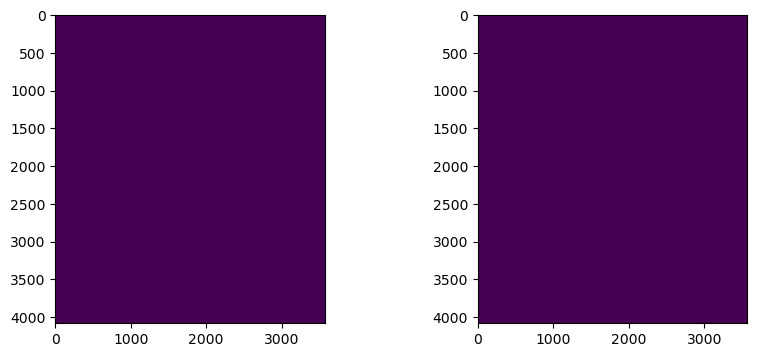

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(elev_dif_maps_[:,:,2])
plt.subplot(1,2,2)
plt.imshow(elev_dif_maps_[:,:,5])


In [16]:
### Setting
path_ele_dif_map = '/home/xin/Developer-luo/Glacier-in-SETP/data/aster-stereo/tiles-dif-map/tile_27_97_albers.tif'


In [17]:
ele_dif_map,_ = readTiff(path_ele_dif_map)



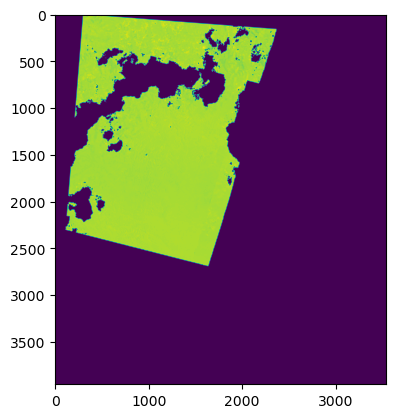

In [23]:
ele_dif_map.shape
plt.imshow(ele_dif_map[:,:,1])


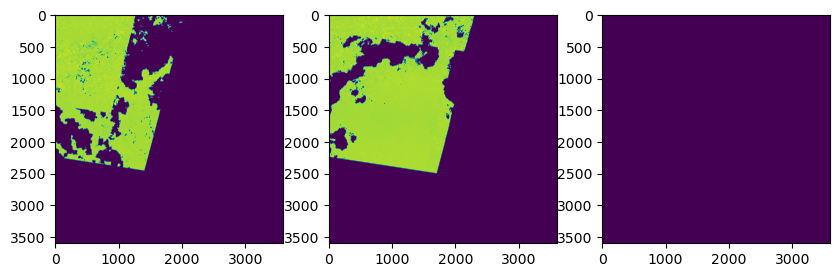

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(ele_dif_map[:,:,0])
plt.subplot(1,3,2)
plt.imshow(ele_dif_map[:,:,1])
plt.subplot(1,3,3)
plt.imshow(ele_dif_map[:,:,2])


array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]])